In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('completeSpamAssassin 2.csv')

In [3]:
data.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [4]:
data.shape

(6046, 3)

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [7]:
data.columns # getting list of column names

Index(['Body', 'Label'], dtype='object')

In [8]:
data.isna().sum()

Body     1
Label    0
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.sample(5)

,Body,Label
3997,"URL: http://www.newsisfree.com/click/-2,841882...",0
4687,Bod wrote\n> /Enter the rant.\n>\n> One thing ...,0
2689,"\nIn essence, hindsight justification. The pr...",0
4780,"\n> hmm, I've never used gentoo\n> so I'll hav...",0
420,empty,1


In [11]:
data.shape

(6045, 2)

In [12]:
data.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [14]:
message=data['Body']
clas=data['Label']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

The number of spam emails is 1895


The number of genuine emails is 4150




<AxesSubplot:xlabel='Label', ylabel='count'>

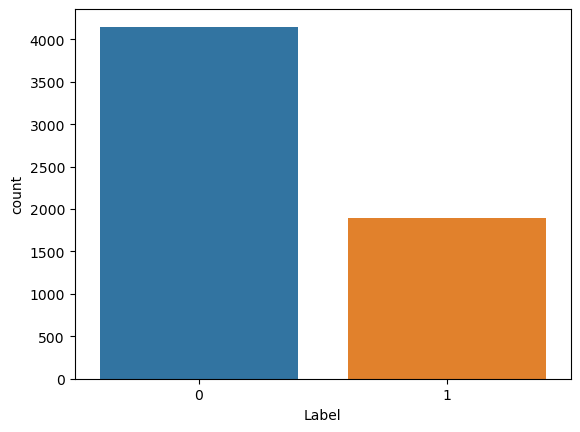

In [16]:
print('The number of spam emails is', clas.value_counts()[1])
print()
print()
print(f'The number of genuine emails is {clas.value_counts()[0]}')
print()
print()
sns.countplot(x=clas)


In [17]:
message.shape

(6045,)

In [18]:
clas.shape

(6045,)

In [19]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yubar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yubar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
nltk.download('stopwords') #downloading stopwords corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yubar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def process_email(text): # creating a function to pre process the email
  lemmatizer=WordNetLemmatizer() #creating instance of WordNetLemmatizer
  nopunc=[]
  for char in text: # removing punctuations
    if char not in string.punctuation:
      nopunc.append(char)
  nopunc = ''.join(nopunc)
  clean_words = []
  for word in nopunc.split(): # removing stopwords
    if word.lower() not in stopwords.words('english'):
        lemma=lemmatizer.lemmatize(word.lower()) #lemmatizing the words
        clean_words.append(lemma)
  return clean_words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [23]:
cv=CountVectorizer(analyzer=process_email)

In [24]:
x=cv.fit_transform(message)

In [25]:
x_train, x_test,y_train, y_test=train_test_split(x,clas, test_size=0.2, random_state=100)

In [26]:
x_train.shape

(4836, 86640)

In [27]:
x_test.shape

(1209, 86640)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
model=MultinomialNB()

In [30]:
model.fit(x_train, y_train)

MultinomialNB()

In [31]:
#model.score(x_test, y_test)

In [32]:
#model.score(x_train, y_train)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       804
           1       0.91      0.98      0.94       405

    accuracy                           0.96      1209
   macro avg       0.95      0.96      0.96      1209
weighted avg       0.96      0.96      0.96      1209


The confusion matrix for the model is: 
 [[765  39]
 [  9 396]]


Thus, the accuracy of our model is: 96.02977667493796 percent.


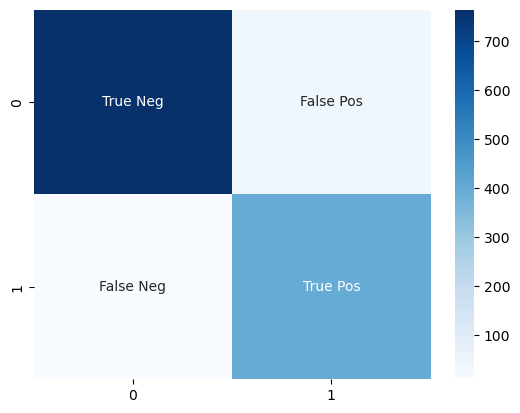

In [33]:
#checking the accuracy of the model in test data
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
pred=model.predict(x_test)

#classification report:
print(classification_report(y_test,pred))
print()

#confusion matrix:
my_confusion = confusion_matrix(y_test,pred)
print(f'The confusion matrix for the model is: \n {my_confusion}')
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(my_confusion, annot=labels, fmt='', cmap='Blues')
print()

#accuracy score
print('Thus, the accuracy of our model is:',accuracy_score(pred,y_test)*100 ,'percent.')



<AxesSubplot:>

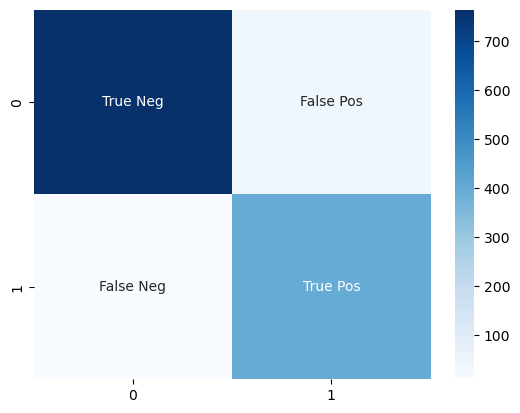

In [34]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(my_confusion, annot=labels, fmt='', cmap='Blues')

In [35]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

In [36]:
model1

MultinomialNB()

In [37]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model1.predict(vect)
print(my_prediction)

[1]


In [38]:
msg="Hello Udaya"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model1.predict(vect)
print(my_prediction)

[0]


In [39]:
#from keras.utils.vis_utils import plot_model

In [40]:
from win32com.client import Dispatch

In [41]:
def speak(text):
    speak=Dispatch(("SAPI.SpVoice"))
    speak.Speak(text)

In [42]:
def result(msg):
    data = [msg]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

In [53]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [54]:
import os
def resource_path(relative):
    try:
        base_path = sys._MEIPASS
    except Exception:
        base_path= os.path.abspath(".")
    return os.path.join(base_path, relative)

In [57]:
resource_path('u.jpg')

'C:\\Users\\yubar\\Downloads\\NLP\\NLP CW 2\\u.jpg'

In [55]:
#importing necessary libraries
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import messagebox

In [59]:
#making GUI
root=tk.Tk()
root.geometry("1200x1900")   #size of GUI
root.title('CheckMail')   #title

image0 = Image.open(resource_path('u.jpg')) #importing image
bck = ImageTk.PhotoImage(image0)

#lable=tk.Label(root, image=bck)
#lable.place(x=0,y=0, relwidth=1, relheight=1)   #settinng the image as background
 
l2=tk.Label(root, text="CheckMail", font=('Arial',100))  #giving title
l2.pack(pady=50, padx=10)

l1=tk.Label(root, text="Paste your e-mail here:", font=('Arial', 18))  #giving subtitle
l1.pack(padx=10, pady=20)

email=tk.Text(root, width=70,height=5, font=('Arial 12'), bg='white', fg='blue') #giving box to paste texts/emails
email.pack(padx=20, pady=5)

#making checkbox and making sure it is chekced by users before proceeding
checkstate=tk.IntVar()
check = tk.Checkbutton(root, text='I agree to share my personal email here.',font=('Arial',12), 
                       variable=checkstate )
check.pack(padx=5, pady=5)

    
def clear_all():             #defining fucntion that clears everything pasted/written in textbox.
    email.delete('1.0', END)
    
def result():                     #defining result function with different if conditions 
    data = [email.get('1.0',END)]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    
    if checkstate.get()==0 and my_prediction[0]==1:      
        messagebox.showinfo(title="Error!", message='Please tick the checkbox')
        
    elif  checkstate.get()==0 and my_prediction[0]==0:
        messagebox.showinfo(title="Error!", message='Please tick the checkbox')
        
    elif checkstate.get()==1 and my_prediction[0]==1:
        speak("This is a Spam mail")
        #spam = tk.Label(text='This is a Spam mail').pack()
        messagebox.showinfo(title="Warning!", message='This is a Spam mail')
        
    elif checkstate.get()==1 and my_prediction[0]==0:
        speak("This is not a Spam mail")
        messagebox.showinfo(title="Okay!", message='This is not a Spam mail')
        
  

processbutton=tk.Button(root, text="Proceed!", font=('Arial', 24),command=result)  #proceed button that gives result
processbutton.pack(padx=10,pady=10)

#clear button that clears everything in textbox
clearbutton=tk.Button(root, text="Clear", font=('Arial', 24),command=clear_all)    
clearbutton.pack(padx=10,pady=10)

root.mainloop()